- Activation function

  Nonlinear function

  -> 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 계속 쌓을 수 없다. 활성화 함수가 f(x) = Wx라 가정할때, 은닉층 두개를 추가하면 y(x) = f(f(f(x)))이다. 이는 다시 y(x) = kx로 표현이 가능하여, 은닉층 여러 번을 추가한 것과 1번 추가한 것의 차이를 줄 수 없게 된다. 

- Sigmoid function

  끝부분의 작은 기울기가 곱해지게 되면 앞단에는 기울기가 잘 전달되지 않는 Vanishing Gradient Problem이 나타난다.

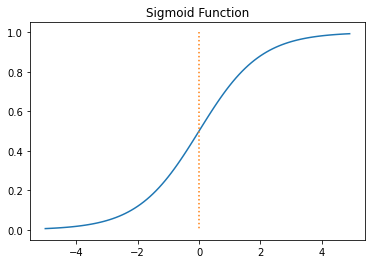

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

- Hyperbolic tangent function

  0이 중심이어서 변화값의 폭이 크다.

  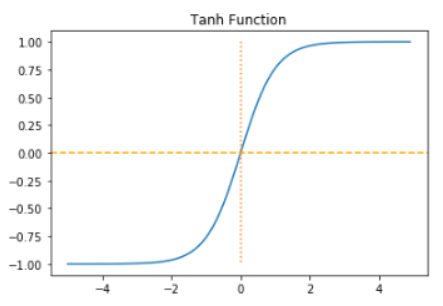

- Relu function

  입력값이 음수이면 회생이 어려운 dying ReLU Problem 존재

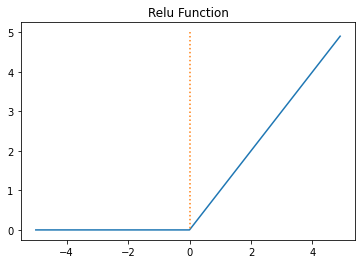

In [3]:
def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

- Leaky ReLU funtion

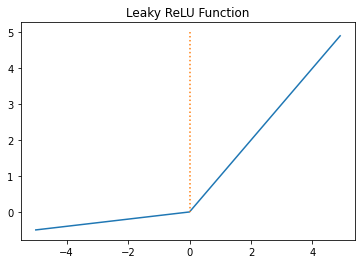

In [4]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

- Softmax funtion

  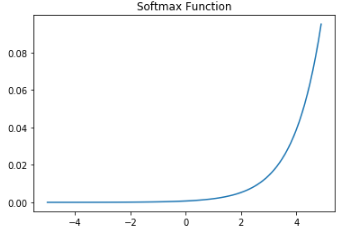

question : activation function : cost function

binary classification : sigmoid : nn.BCELoss()

multi-class classification : softmax : nn.CrossEntropyLoss()

regression : x : MSE

- 다층퍼셉트론으로 MNIST 분류

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [35]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


이 이미지 데이터의 레이블은 5이다


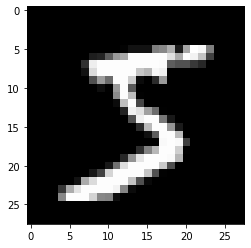

In [31]:
plt.imshow(np.array(X.iloc[0]).reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [36]:
Xx = []
for i in range(70000):
  Xx.append(np.array(X.iloc[i]))

In [33]:
Xx[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [39]:
y = np.array(y)

In [40]:
# training data, test data 분리

import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size = 1/7, random_state = 0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train,y_train)
ds_test = TensorDataset(X_test,y_test)

loader_train = DataLoader(ds_train,batch_size = 64, shuffle = True)
loader_test = DataLoader(ds_test,batch_size = 64, shuffle = True)

In [41]:
from torch import nn
from torch import optim

model = nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
def train(epoch):
  model.train() # 학습모드로 전환

  for data, targets in loader_train:
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output,targets)
    loss.backward()
    optimizer.step()

def test():
  model.eval() # 추론 모드
  correct = 0

  with torch.no_grad():
    for data,targets in loader_test:
      outputs = model(data)

      _, predicted = torch.max(outputs.data,1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()

  data_num = len(loader_test.dataset)
  print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [42]:
for epoch in range(3):
    train(epoch)

test()


테스트 데이터에서 예측 정확도: 9586/10000 (96%)



예측 결과 : 2


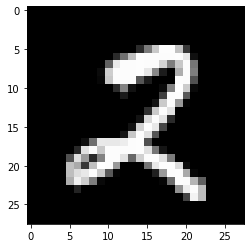

In [43]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_,predicted = torch.max(output.data,0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')

- Overfitting 방지법

  데이터 양 증강, 모델 복잡도 줄이기, 가중치 규제 적용, dropout

- Gradient Vanishing and Exploding

  1. 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭 탄젠트 대신 ReLU나 그 변형 함수 사용

  2. Weight initialization

    - Xavier initialization : 균등 분포나 정규분포로 초기화 (ReLu와 함께 사용할 경우 성능이 좋지 않음)

    - He initialization: 세이비어 초기화와 다르게 다음 층의 뉴런 수를 반영하지 않는다. ReLU와도 상성이 좋다.

  3. Batch normalization

    - internal covariate shift : 층 별로 입력 데이터 분포가 달라지는 현상

    - bach normalization : 한 번에 들어오는 배치 단위로 정규화 (미니 배치 크기에 의존적, RNN에 적용 어려움)

  4. Layer Normalization

